In [1]:
# rabanne_uk_analysis.ipynb
# This file illustrates hypothetical data creation and analysis for Rabanne UK

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ------------------------------
# 1) Create Synthetic Sales Data
# ------------------------------

# Sample years and UK revenues for Rabanne (EUR millions)
years = list(range(2018, 2026))
uk_revenues = [80, 95, 110, 125, 145, 170, 200, 230]

data_sales = pd.DataFrame({
    "Year": years,
    "Revenue_EUR_m": uk_revenues
})

data_sales["Revenue_Growth_%"] = data_sales["Revenue_EUR_m"].pct_change() * 100

data_sales.head()

,Year,Revenue_EUR_m,Revenue_Growth_%
0,2018,80,NaN
1,2019,95,18.750000
2,2020,110,15.789474
3,2021,125,13.636364
4,2022,145,16.000000


In [2]:
# -----------------------------------
# 2) Add Profit Margin Information
# -----------------------------------
# Hypothetical net margin for UK unit (e.g., between 18–22%)

np.random.seed(42)
data_sales["Profit_Margin_%"] = np.random.uniform(18, 22, len(data_sales)).round(2)
data_sales["Net_Profit_EUR_m"] = (data_sales["Revenue_EUR_m"] * data_sales["Profit_Margin_%"] / 100).round(2)

data_sales

,Year,Revenue_EUR_m,Revenue_Growth_%,Profit_Margin_%,Net_Profit_EUR_m
0,2018,80,NaN,19.50,15.60
1,2019,95,18.750000,21.80,20.71
2,2020,110,15.789474,20.93,23.02
3,2021,125,13.636364,20.39,25.49
4,2022,145,16.000000,18.62,27.00
5,2023,170,17.241379,18.62,31.65
6,2024,200,17.647059,18.23,36.46
7,2025,230,15.000000,21.46,49.36


In [3]:
# -----------------------------------
# 3) Add Consumer Demographics
# -----------------------------------

# Example demographic survey proportions (consumer base)
uk_demographics = pd.DataFrame({
    "Age_Group": ["18-24","25-34","35-44","45-54","55+"],
    "Percent_Customers": [12, 27, 25, 20, 16],
    "Avg_Spend_EUR": [75, 95, 110, 90, 85]
})

uk_demographics

,Age_Group,Percent_Customers,Avg_Spend_EUR
0,18-24,12,75
1,25-34,27,95
2,35-44,25,110
3,45-54,20,90
4,55+,16,85


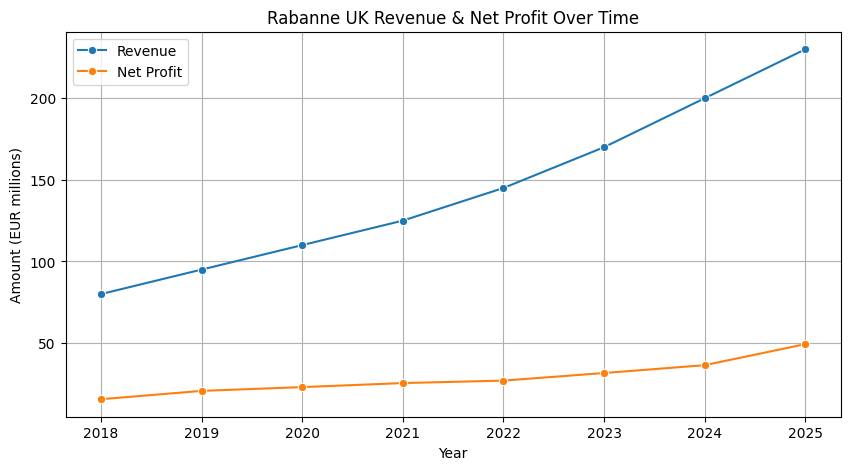

In [4]:
# ------------------------------------
# 4) Visualize Sales & Profit Trends
# ------------------------------------

plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Revenue_EUR_m", data=data_sales, marker="o", label="Revenue")
sns.lineplot(x="Year", y="Net_Profit_EUR_m", data=data_sales, marker="o", label="Net Profit")
plt.title("Rabanne UK Revenue & Net Profit Over Time")
plt.ylabel("Amount (EUR millions)")
plt.grid(True)
plt.legend()
plt.show()

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_86478/1531365881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age_Group", y="Percent_Customers", data=uk_demographics, palette="viridis")


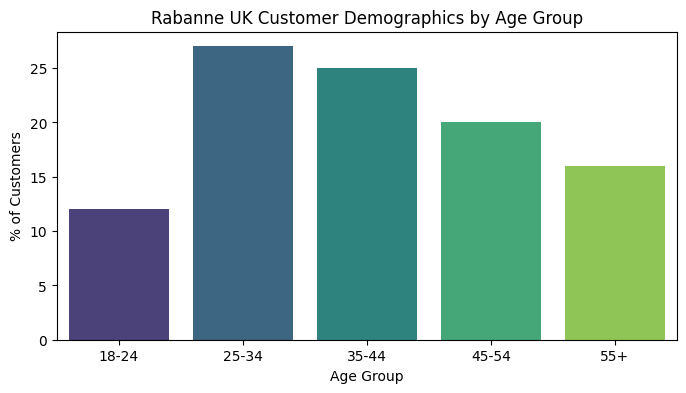

In [5]:
# ---------------------------------------
# 5) Visualize Demographic Breakdown
# ---------------------------------------

plt.figure(figsize=(8,4))
sns.barplot(x="Age_Group", y="Percent_Customers", data=uk_demographics, palette="viridis")
plt.title("Rabanne UK Customer Demographics by Age Group")
plt.ylabel("% of Customers")
plt.xlabel("Age Group")
plt.show()

In [6]:
# ----------------------------------
# 6) Calculate Average Revenue Per Customer
# ----------------------------------
# Assume total customer counts per year
# Hypothetical: 2018 customers = 50,000; +15% growth per year

cust_counts = [50000 * (1.15**i) for i in range(len(years))]
data_sales["Customers_Est"] = [int(x) for x in cust_counts]
data_sales["Avg_Revenue_per_Cust_EUR"] = (data_sales["Revenue_EUR_m"]*1e6 / data_sales["Customers_Est"]).round(2)

data_sales[["Year","Customers_Est","Avg_Revenue_per_Cust_EUR"]]

,Year,Customers_Est,Avg_Revenue_per_Cust_EUR
0,2018,50000,1600.00
1,2019,57499,1652.20
2,2020,66124,1663.54
3,2021,76043,1643.81
4,2022,87450,1658.09
5,2023,100567,1690.42
6,2024,115653,1729.31
7,2025,133000,1729.32


In [7]:
# ------------------------------------
# Optional: Save cleaned datasets
# ------------------------------------
data_sales.to_csv("rabanne_uk_sales_profit.csv", index=False)
uk_demographics.to_csv("rabanne_uk_demographics.csv", index=False)